# Lending Case Study

In [119]:
# Importing libraries

import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading loan dataset

In [120]:
loan = pd.read_csv("C://Users//DELL//Desktop//Lending Assignment//loan.csv")

#### Data Understanding

In [121]:
# View the number of rows and columns in original data set 
loan.shape

(39717, 111)

In [122]:
# Print first 5 rows
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [123]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### Data Cleaning

Need to fix rows and columns
Need to fix missing values
Need to standardise values
Need to fix invalid values
Need to filter data

-> Checklist for Fixing Rows

-> Checklist for Fixing Columns

-> Checklist for missing values

-> Checklist for Standardise values

-> Checklist for Fixing invalid values

-> Checklist for Filtering Data

#### To check the missing values in the columns 

In [124]:
loan_missing=round(100 * (loan.isnull().sum()/len(loan.index)), 2)


In [125]:
loan_missing

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

#### Dropping columns which have all the 100% missing values in respective columns (54 columns)

In [126]:
loan.dropna(axis=1, how='all', inplace=True)

#### As next_pymnt_d has highest misssing data and also since it doesnt seem to be a good predictor dropping it

In [127]:
loan.drop(['next_pymnt_d'], axis = 1, inplace=True)

In [128]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

#### Filtering target variable loan_status. Since we need to predict whether loan applicant will likely to be Default/Non-Default. Removing the unwanted current type as it is ongoing 

In [129]:
currentstats = loan[(loan['loan_status'] =='Current')].index

In [130]:
currentstats.dtype

dtype('int64')

In [131]:
loan.drop(currentstats,inplace= True)

In [132]:
# Factorizing target variable into encoding format for analysis(0's and 1's)
# 0 indicates fully-paid
# 1 indicates charged-off or Default
loan['loan_status'] = pd.factorize(loan['loan_status'])[0]

In [133]:
loan['loan_status'].unique()

array([0, 1], dtype=int64)

In [134]:
loan['loan_status'].describe()

count    38577.000000
mean         0.145864
std          0.352975
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

#### Dropping mths_since_last_record as it doesn't seem to be a critical predictor

In [135]:
loan.drop(['mths_since_last_record'], axis = 1, inplace=True)

In [136]:
# Checking for duplicate rows
loan.duplicated().sum()

0

#### Dropping mths_since_last_delinq as it relates to customer behaviour variable and doesn't seem to be a critical predictor

In [137]:
loan.drop(['mths_since_last_delinq'], axis = 1, inplace=True)

In [138]:
loan.shape

(38577, 54)

In [139]:
round(100 * (loan.isnull().sum()/len(loan.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.68
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.47
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

#### Dropping desc column as it is related to comments provided by borrower and doesn't seem to be a valid predictor

In [140]:
loan.drop(['desc'], axis = 1, inplace=True)

#### Dropping emp_title as it doesn't qualify as a good predictor

In [141]:
loan.drop(['emp_title'], axis = 1, inplace=True)

In [142]:
#checking the values in emp_length
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

#### Filtering notnull values from emp_length since we have very less percentage of null values

In [143]:
loan=loan[loan['emp_length'].notnull()]

#### standardizing the value for the emp_length

In [144]:
#getting only the value for the emp_length and removing the unnecessary part of the variable
loan['emp_length'] = loan['emp_length'].astype(str).str.strip('<+ years')

In [145]:
loan['emp_length'] = loan['emp_length'].astype(int)

#### Filtering notnull values from pub_rec_bankruptcies since we have very less percentage of null values

In [146]:
loan=loan[loan['pub_rec_bankruptcies'].notnull()]

#### Since we have very less percentage of null values, Filtering notnull values from last_pymnt_d, ,collections_12_mths_ex_med,last_credit_pull_d

In [147]:
loan=loan[loan['last_pymnt_d'].notnull()]

In [148]:
loan=loan[loan['collections_12_mths_ex_med'].notnull()]

In [149]:
loan=loan[loan['last_credit_pull_d'].notnull()]

#### Eliminating Customer behaviour variables which are not good predictors for data analysis

In [150]:
loan.drop(['revol_bal','revol_util','earliest_cr_line','delinq_2yrs'], axis = 1, inplace=True)

In [151]:
loan.drop(['delinq_amnt', 'acc_now_delinq','policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths',
'tax_liens', 'collections_12_mths_ex_med'],axis=1, inplace=True)

#### Removing id, member_id, url column can be removed as they have unique values for the purpose of loan identification only
#### zipcode column can be removed as it has only first three digits and that information can be obtained by the state colum
#### title column can be removed because it is redundant with purpose column which has fewer categories

In [152]:
loan.drop(['id','member_id','zip_code','title','url'], axis = 1, inplace=True)

#### Application type has only one type of value that is individual and also it is not useful for our analysis so dropping it

In [153]:
loan.drop(['application_type'],axis = 1, inplace=True)

In [154]:
loan.shape

(36778, 34)

In [155]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')


### Identify Categorical Columns
Count of no of unique values in the column

In [156]:
data = []
for row in loan.columns.tolist():
    data.append({'column': row, 'count': len(loan[row].unique())})

In [157]:
unique = pd.DataFrame(data).sort_values('count')

In [158]:
unique.head(19)

,column,count
22,out_prncp_inv,1
21,out_prncp,1
13,loan_status,2
3,term,2
33,pub_rec_bankruptcies,3
11,verification_status,3
9,home_ownership,4
19,pub_rec,5
6,grade,7
17,inq_last_6mths,9


### Deriving proper values from columns

Deriving int_rate_percentage column from int_rate by stripping % and dropping int_rate

In [159]:
loan['int_rate'] = loan['int_rate'].str.rstrip('%')

In [160]:
loan['int_rate'] = loan['int_rate'].astype(float)

#### Analysing term column datatype

#### As this is object type, Removing the unwanted chars to convert to int data type

In [161]:
loan['term'] = loan['term'].map(lambda x: x.rstrip(' months'))

In [162]:
loan['term'] = loan['term'].astype(int)

#### Analysing the column emp_length 

In [163]:
#getting only the value for the emp_length and removing the unnecessary part of the variable
loan['emp_length'] = loan['emp_length'].astype(str).str.strip('<+ years')

In [164]:
#checking the values in the emp_length
loan['emp_length'].unique()

array(['10', '1', '3', '8', '9', '4', '5', '6', '2', '7'], dtype=object)

#### deriving the month and year from last_paymnt_d

In [165]:
loan['last_pymnt_d_month'], loan['last_pymnt_d_year'] = loan[
    'last_pymnt_d'].str.split('-').str

#### deriving the month and year from issue_d_month

In [166]:
loan['issue_d_month'], loan['issue_d_year'] = loan[
    'issue_d'].str.split('-').str

In [167]:
loan['issue_d_year'] = '20' + loan['issue_d_year']

### Updated column datatype

In [168]:
# updating datatype to float for numeric columns
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'dti', 
            'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'int_rate', 'emp_length',
          ]
loan[columns] = loan[columns].astype(np.float)

In [169]:
loan['loan_inc_ratio'] = loan.funded_amnt*100/loan.annual_inc


In [170]:
columns = ['total_acc', 'term', 'issue_d_year']
loan[columns] = loan[columns].astype(np.int)

In [171]:
# updating to category datatype 
columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
loan[columns] = loan[columns].apply(lambda x: x.astype('category'))

In [172]:
loan['annual_inc_lakhs'] = loan['annual_inc'] / 1000
loan['annual_inc_lakhs'].describe()

count    36778.000000
mean        69.443133
std         64.071836
min          4.000000
25%         41.007390
50%         60.000000
75%         83.000000
max       6000.000000
Name: annual_inc_lakhs, dtype: float64

### Count of Categorical and Numeric columns

In [173]:
numeric_data = loan.select_dtypes(include = [np.number])

categorical_data = loan.select_dtypes(exclude = [np.number, np.object])

string_data = loan.select_dtypes(include = [np.object])

print('There are {0} numerical , {1} categorical and {2} string features in the loan data'.\
     format(numeric_data.shape[1], categorical_data.shape[1], string_data.shape[1]))

There are 23 numerical , 11 categorical and 6 string features in the loan data


In [174]:
# Final dataset for Exploratory Data Analysis
loan_data_final = loan

### Univariate Analysis

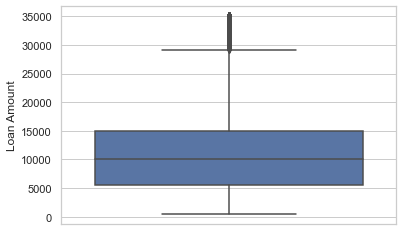

In [175]:
# plot to check the variation of the loan amount
sns.boxplot( y=loan_data_final["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

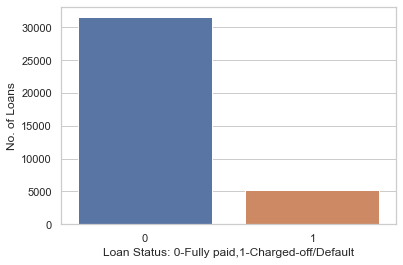

In [176]:
# plot for loan status (target variable)
ax1=sns.countplot(x= loan_data_final["loan_status"])
ax1.set(xlabel='Loan Status: 0-Fully paid,1-Charged-off/Default', ylabel='No. of Loans')
plt.show()

Insights from the above graph:

->More than 30000 loans are fully paid.

->Around 5000 loans are charged off.

In [177]:
# findinf the frequencies of target column 
loan_data_final["loan_status"].value_counts()

0    31565
1     5213
Name: loan_status, dtype: int64

Inference:

->Most of the loans are Fully Paid.

->About 14% of loan are having status as defaulters.

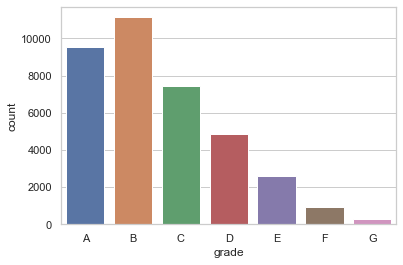

In [178]:
# plot for grade
sns.countplot(x='grade', data=loan_data_final)
plt.show()

Inference: Most of the loans have grade A and B

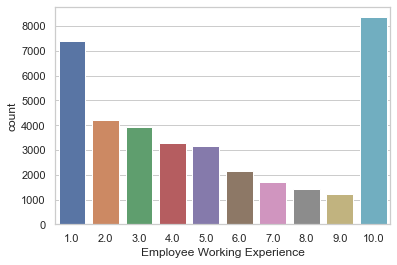

In [179]:
# employee length plot
sns.countplot(x='emp_length', data=loan_data_final)
plt.xlabel('Employee Working Experience')
plt.show()

Inference: Majority of employees applying for the loan have more than 10 years of experience

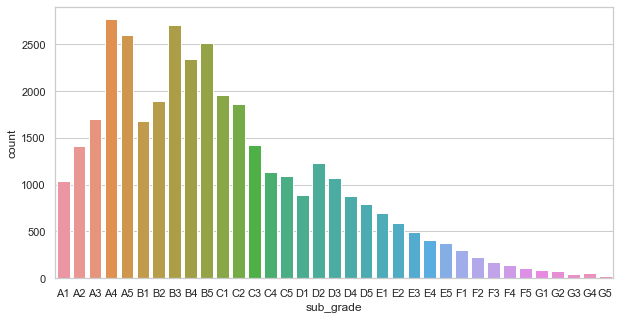

In [180]:
plt.figure(figsize=(10,5))
sns.countplot(loan['sub_grade'], order=sorted(loan_data_final.sub_grade.unique()))
plt.show()

Inference: majority of the employees lie in A4 subgrade

### Year Wise and Month Wise Distribution of charged-off and fully paid loans


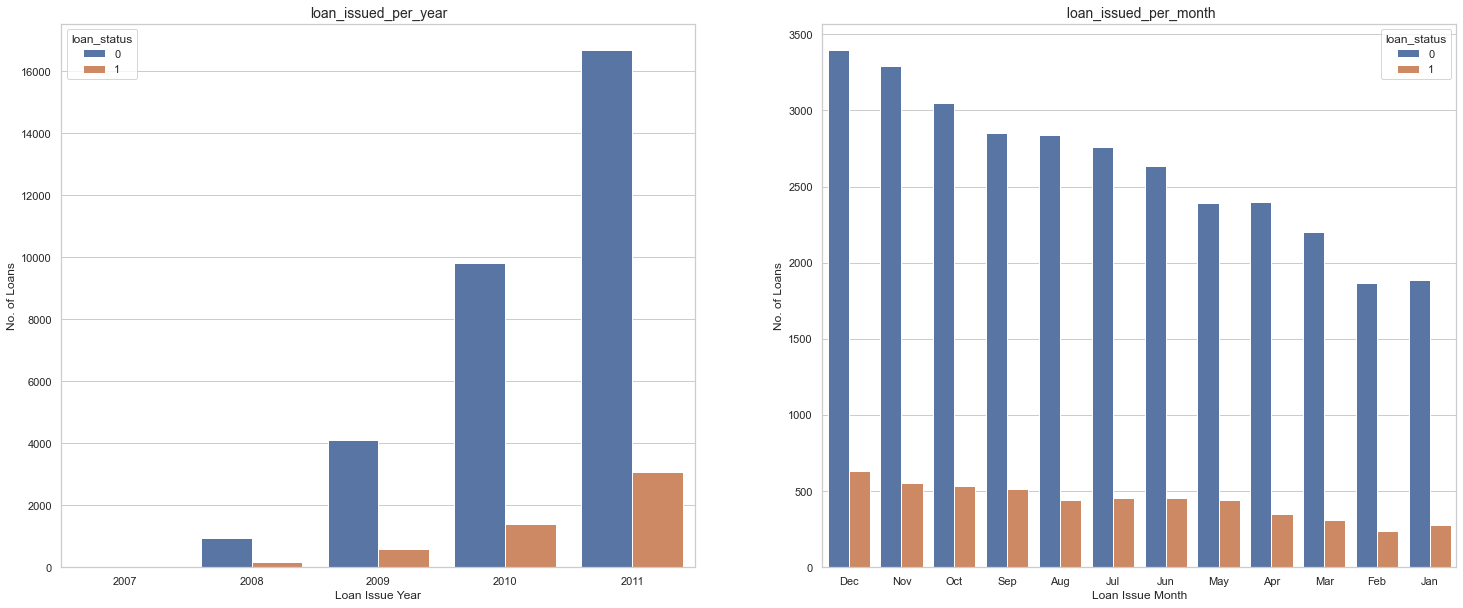

In [181]:
# year wise distribution of loans
plt.figure(figsize=(25,10))
plt.subplot(1, 2, 1)
ax1=sns.countplot(loan_data_final['issue_d_year'],hue=loan_data_final['loan_status'])
                 
ax1.set_title('loan_issued_per_year', fontsize=14)
ax1.set(xlabel='Loan Issue Year', ylabel='No. of Loans')




# month wise distribution of loans 
plt.subplot(1, 2, 2)
ax4=sns.countplot(loan_data_final['issue_d_month'],hue=loan_data_final['loan_status'])
ax4.set_title(' loan_issued_per_month', fontsize=14)
ax4.set(xlabel='Loan Issue Month', ylabel='No. of Loans')

plt.show()


##### Insights from the above graph

->No. of loans, fully paid and charged off are increasing every year. They are at maximum in the year 2011. This is a very positive trend for Lending Club as the requirement of loans are increasing by each year.

->The month-wise trend shows that most loans are fully paid as well as charged off as the year comes to an end, maximum in the month of December clearly stating the importance of year-end.

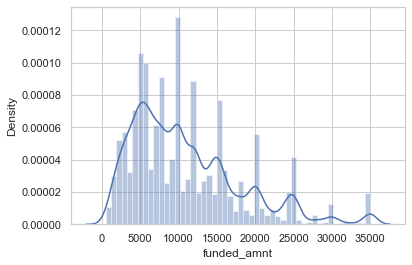

In [182]:
#plotting graph for funded amt to analyse the area where the funded amt lies
sns.distplot(loan_data_final['funded_amnt'])
plt.show()

Inference: Funded amount is left skewed. Most of the loan amount given is 8 lakhs

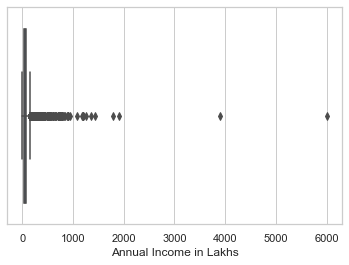

In [183]:
sns.boxplot(x=loan_data_final['annual_inc_lakhs'])
plt.xlabel('Annual Income in Lakhs')
plt.show()

Inference: There are only two applicants having annual income of more than 30 lakhs

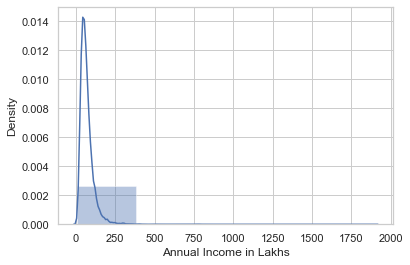

In [184]:
# creating bins to analyse annual income(not considering outliers) in lakhs
sns.distplot(loan_data_final[loan_data_final['annual_inc_lakhs'] < 3000]['annual_inc_lakhs'], bins=5)
plt.xlabel('Annual Income in Lakhs')
plt.show()

Inference: Majority of loan applicants have income less than 5 lakhs

#### Bivariate Analysis

#### Analysing Interest rate and grade columns 

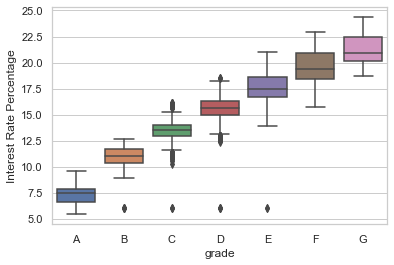

In [185]:
sns.boxplot(y='int_rate',x='grade', data=loan_data_final)
plt.ylabel('Interest Rate Percentage')
plt.show()

Inference: G grade have the max interest rate 

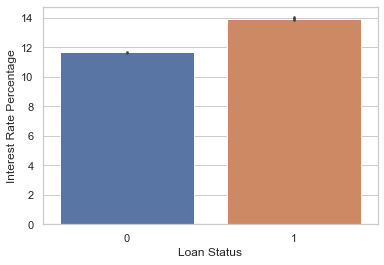

In [186]:
#analysing for the intrest rate and the loan status
sns.barplot(y='int_rate', x='loan_status', data=loan_data_final)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

Inference:Charged off is high for higher interest rate

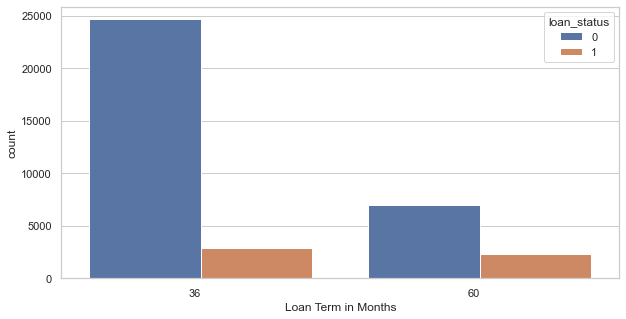

In [187]:
#Analysing for the term and loan_status ,plotting a graph for them
sns.set(font_scale=1.0)
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
ax=sns.countplot(x='term',hue='loan_status',order=sorted(loan.term.unique()),data=loan_data_final)
plt.xlabel('Loan Term in Months')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
plt.show()


Inference:For 36 month term there were maximum fully paid loans

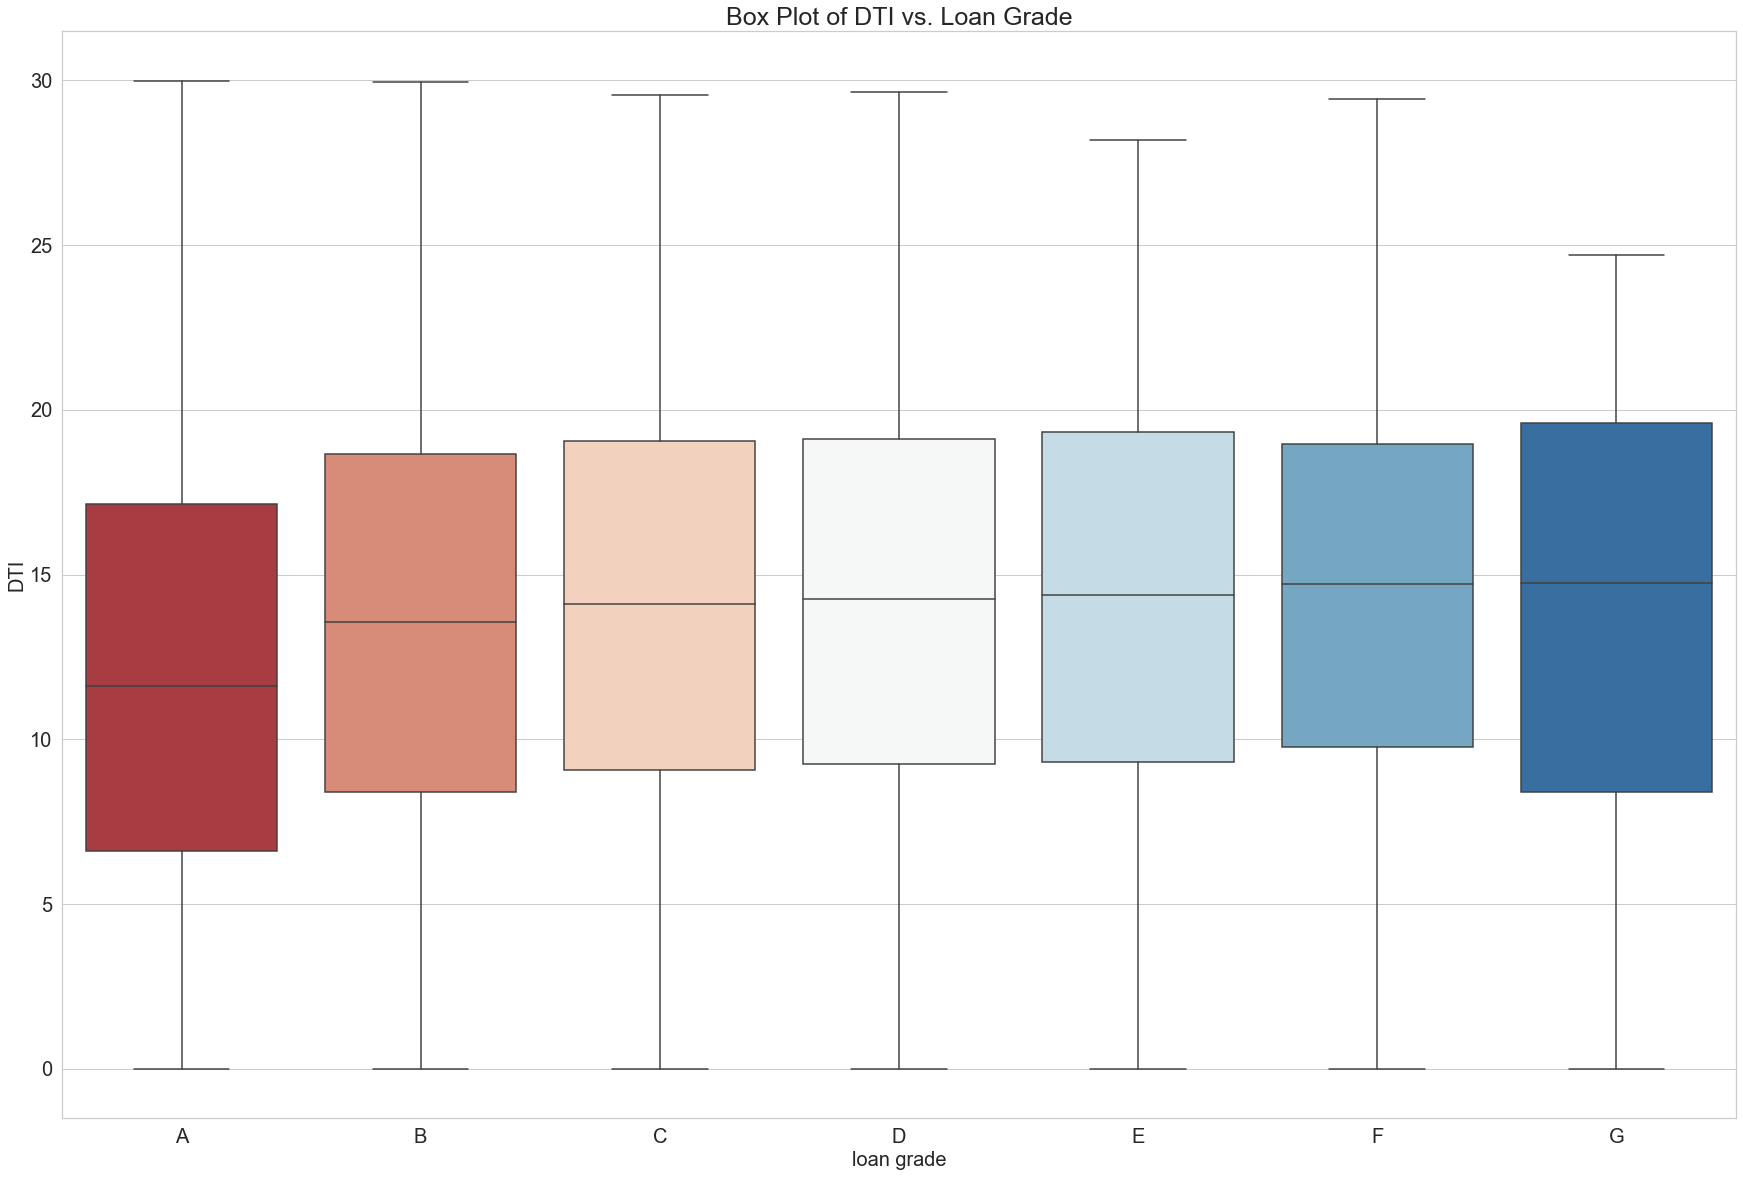

In [188]:
#Analysing the DTI wrt Grade and plotting the box plot 
plt.figure(figsize=(30,20))
sns.boxplot(y="dti", x="grade", data=loan_data_final, palette="RdBu")
plt.title('Box Plot of DTI vs. Loan Grade', fontsize=25)
plt.xlabel('loan grade', fontsize=20)
plt.ylabel('DTI', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Inference:G grade has the heighest DTI

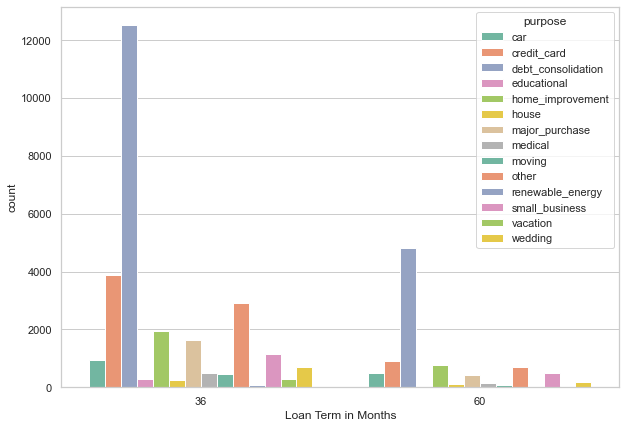

In [189]:
#Analysing for the purpose and term 
plt.figure(figsize=(10,7))
sns.countplot( x="term", hue='purpose', data=loan_data_final ,palette='Set2')
plt.xlabel('Loan Term in Months')
plt.show()

For 36 and 60 months debt_consolidation is major loan purpose

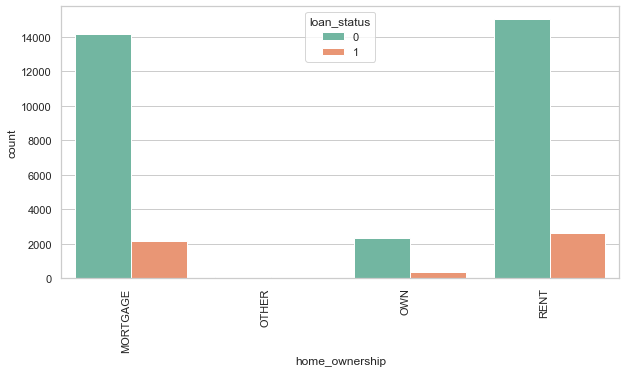

In [190]:
#Analysing the home_ownership wrt loan_staus and plotting the countplot for them
sns.set(font_scale=1.0)
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
ax=sns.countplot(x='home_ownership',hue='loan_status',order=sorted(loan_data_final.home_ownership.unique()),data=loan_data_final,palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

Inference:Rent type of people have majorityly fully paid the loan

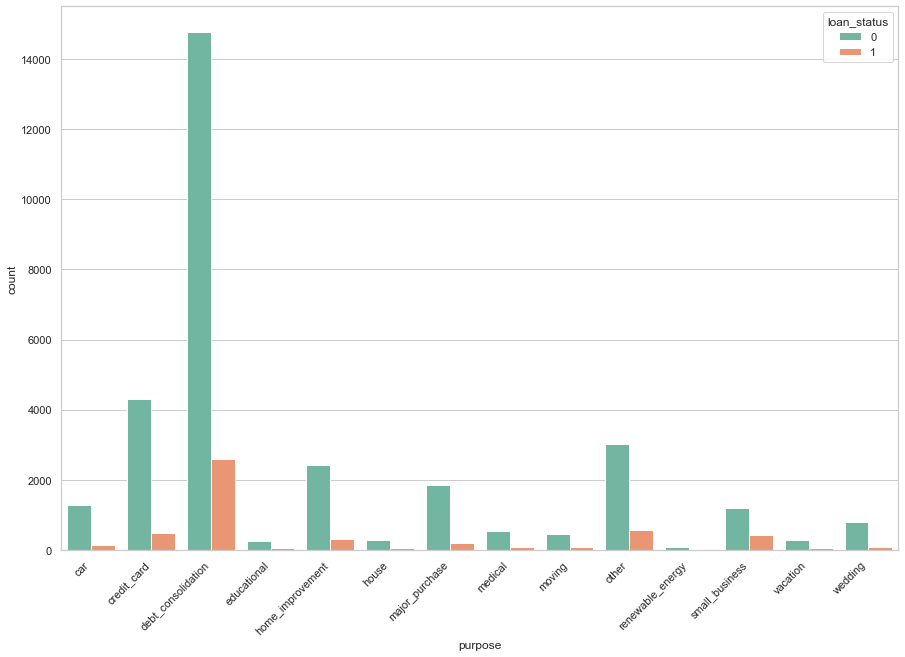

In [191]:
#Analysisng Loan status wrt Purpose and plotting countplot for the same
sns.set(font_scale=1.0)
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
ax=sns.countplot(x='purpose',hue='loan_status',order=sorted(loan_data_final.purpose.unique()),data=loan,palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

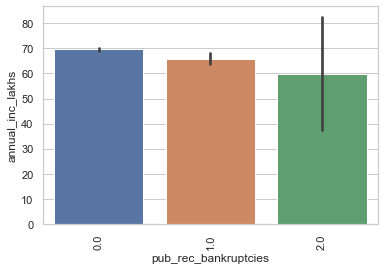

In [192]:
#Analysing 
sns.barplot(y='annual_inc_lakhs', x='pub_rec_bankruptcies', data=loan_data_final)
plt.xticks(rotation=90)
plt.show()

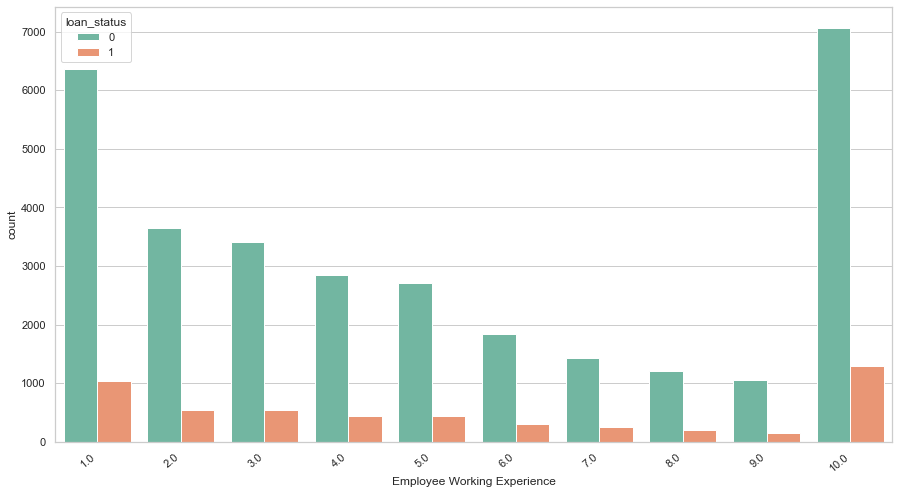

In [193]:
# plotting graph for loan status wrt emp_length
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
ax=sns.countplot(x='emp_length',hue='loan_status',order=sorted(loan.emp_length.unique()),data=loan_data_final,palette='Set2')
plt.xlabel('Employee Working Experience')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Inference:most of the employees who are non-defaulters have experience more than 10 years

In [ ]:
del loan_data_final['out_prncp']
del  loan_data_final['out_prncp_inv']

## Correlation bewteen the variables

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(loan_data_final.corr())
plt.show()

In [ ]:
del numeric_data['out_prncp']
del  numeric_data['out_prncp_inv']

In [ ]:
plt.figure(figsize=(15,40))


for i in range(len(numeric_data.columns)):
    plt.subplot(8,3, i + 1)
    sns.boxplot(y=numeric_data.columns[i], x='loan_status', data=loan_data_final)

plt.show()

### Loan Status vs Loan Amount of charged off loans

In [ ]:
sns.set(font_scale=1.0)
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
sns.barplot(x='loan_status',y='loan_amnt', hue='verification_status', data=loan_data_final)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()


##### Insights from the above graph

->Max no. of loans are charged off where verification status is Verified.



In [ ]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan_data_final['dti'] = loan_data_final['dti'].apply(lambda x: dti(x))

In [ ]:
loan_data_final['dti']

In [ ]:
sns.countplot(x='dti', hue="loan_status", data=loan_data_final)

In [ ]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan_data_final['int_rate'] = loan_data_final['int_rate'].apply(lambda x: int_rate(x))

In [ ]:
sns.countplot(x='int_rate',hue="loan_status", data=loan_data_final)

In [ ]:
sns.set(font_scale=1.0)
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
ax=sns.countplot(x='verification_status',hue='loan_status',order=sorted(loan_data_final.verification_status.unique()),data=loan,palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [ ]:

plt.figure(figsize=(10,10))

ax=sns.countplot(hue='loan_status',x='addr_state',data=loan_data_final)
plt.xlabel('Address State')
plt.ylabel('count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()


Inference: Applicants from the state CA are having high probability to be default

In [ ]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=loan_data_final)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()